In [7]:
import pandas as pd
import math
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import altair as alt
import seaborn as sns
from scipy import stats

In [8]:
df = pd.read_csv('2020.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.shape

(105973, 105)

In [9]:
df_necessidade_especial = df.query("IN_NECESSIDADE_ESPECIAL == 1")

In [10]:
ampliada18 = df_necessidade_especial.query('IN_RECURSO_AMPLIADA_18 == 1').shape[0]
ampliada24 = df_necessidade_especial.query('IN_RECURSO_AMPLIADA_24 == 1').shape[0]
recurso_braile = df_necessidade_especial.query('IN_RECURSO_BRAILLE == 1').shape[0]
recurso_cd = df_necessidade_especial.query('IN_RECURSO_CD_AUDIO == 1').shape[0]
recurso_inter = df_necessidade_especial.query('IN_RECURSO_INTERPRETE == 1').shape[0]
recurso_labial = df_necessidade_especial.query('IN_RECURSO_LABIAL == 1').shape[0]
recurso_ledor = df_necessidade_especial.query('IN_RECURSO_LEDOR == 1').shape[0]
recurso_libras = df_necessidade_especial.query('IN_RECURSO_LIBRAS == 1').shape[0]
recurso_nenhum = df_necessidade_especial.query('IN_RECURSO_NENHUM == 1').shape[0]
recurso_prova_pt = df_necessidade_especial.query('IN_RECURSO_PROVA_PORTUGUES == 1').shape[0]
recurso_transcisao = df_necessidade_especial.query('IN_RECURSO_TRANSCRICAO == 1').shape[0]
recurso_video_libras = df_necessidade_especial.query('IN_RECURSO_VIDEO_LIBRAS == 1').shape[0]

In [11]:
cegueira = df_necessidade_especial.IN_CEGUEIRA.sum()
baixa_visao = df_necessidade_especial.IN_BAIXA_VISAO.sum()
auditiva = df_necessidade_especial.IN_DEF_AUDITIVA.sum()
def_fisica = df_necessidade_especial.IN_DEF_FISICA.sum()
def_inte = df_necessidade_especial.IN_DEF_INTELECTUAL.sum()
surdez = df_necessidade_especial.IN_SURDEZ.sum()
surdocegueira = df_necessidade_especial.IN_SURDOCEGUEIRA.sum()
def_multipla = df_necessidade_especial.IN_DEF_MULTIPLA.sum()
autismo = df_necessidade_especial.IN_AUTISMO.sum()
superd = df_necessidade_especial.IN_SUPERDOTACAO.sum()


aee_braile = df_necessidade_especial.IN_AEE_BRAILLE.sum()
aee_caa = df_necessidade_especial.IN_AEE_CAA.sum()
aee_desen_cog = df_necessidade_especial.IN_AEE_DESEN_COGNITIVO.sum()
aee_enri_cur = df_necessidade_especial.IN_AEE_ENRIQ_CURRICULAR.sum()
aee_info = df_necessidade_especial.IN_AEE_INFORMATICA_ACESSIVEL.sum()
aee_libras = df_necessidade_especial.IN_AEE_LIBRAS.sum()
aee_lingua_port = df_necessidade_especial.IN_AEE_LINGUA_PORTUGUESA.sum()
aee_mobi = df_necessidade_especial.IN_AEE_MOBILIDADE.sum()
aee_opticos_n_opt = df_necessidade_especial.IN_AEE_OPTICOS_NAO_OPTICOS.sum()
aee_vida_aut = df_necessidade_especial.IN_AEE_VIDA_AUTONOMA.sum()
aee_soroban = df_necessidade_especial.IN_AEE_SOROBAN.sum()

### Distribuição de idade dos alunos filtrados

Media: 11.34488029969898
Desvio Padrão: 6.907859506175711
Mediana: 11.0
Moda: 11


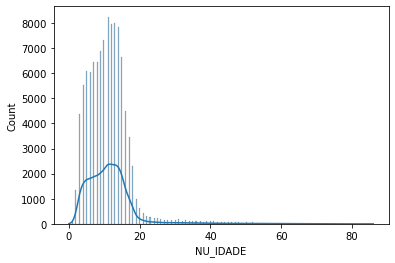

In [12]:
media = df['NU_IDADE'].mean()
std = df['NU_IDADE'].std()
mediana = df['NU_IDADE'].median()
moda = df['NU_IDADE'].mode()
sns.histplot(data=df, x="NU_IDADE", kde= True)
print("Media: " + str(media))
print("Desvio Padrão: " + str(std))
print("Mediana: " + str(mediana))
print("Moda: " + str(moda[0]))

### Teste de Normalidade

In [13]:
k2, p = stats.normaltest(df['NU_IDADE'])
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


### Análise dos Quartis

Primeiro quartil: 7.0
Segundo quartil: 11.0
Terceiro quartil: 14.0
Valor Maximo: 86.0


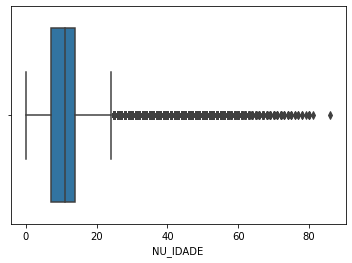

In [14]:
pri_quartil = df['NU_IDADE'].quantile(.25)
seg_quartil = df['NU_IDADE'].quantile(.5)
ter_quartil = df['NU_IDADE'].quantile(.75)
qua_quartil = df['NU_IDADE'].quantile(1)
sns.boxplot(x=df["NU_IDADE"])
print("Primeiro quartil: " + str(pri_quartil))
print("Segundo quartil: " + str(seg_quartil))
print("Terceiro quartil: "+ str(ter_quartil))
print("Valor Maximo: "+ str(qua_quartil))

### Distribuição de Gênero Declarado

54452

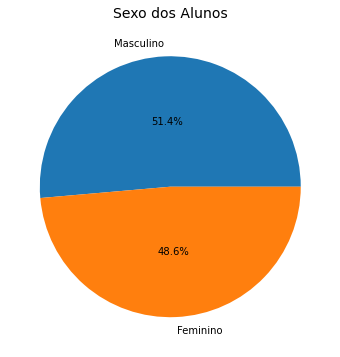

In [15]:
data_sexo = df.groupby("TP_SEXO")['TP_SEXO'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = ["Masculino", "Feminino"]
plt.pie(x=data_sexo, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Sexo dos Alunos", fontsize=14)

data_sexo[1]

### Distribuição por Tipo de Zona Residêncial e de Estudo

83677 Alunos moram em zona Urbana
22296 Alunos moram em zona Rural


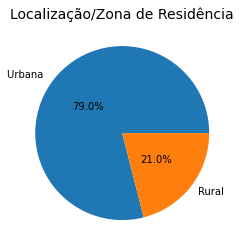

In [16]:
data_regiao = df.groupby("TP_ZONA_RESIDENCIAL")['TP_ZONA_RESIDENCIAL'].count()
pie, ax = plt.subplots()
labels = ["Urbana ", "Rural"]
plt.pie(x=data_regiao, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Localização/Zona de Residência", fontsize=14)
print(str(data_regiao[1]) + " Alunos moram em zona Urbana")
print(str(data_regiao[2]) + " Alunos moram em zona Rural")

In [57]:
regiao_dic = (1,2,3)

t = pd.Series(data=df.groupby("TP_ZONA_RESIDENCIAL")['TP_ZONA_RESIDENCIAL'].count(), index = regiao_dic)
t

1    83677.0
2    22296.0
3        NaN
Name: TP_ZONA_RESIDENCIAL, dtype: float64

101678 Alunos não estudam em localização diferenciada
1180 Alunos estudam em escola localizada em área de assentamento
2944 Alunos estudam em escola localizada em terra indígena
171 Alunos estudam em escola localizada em comunidade remanescente de quilombos


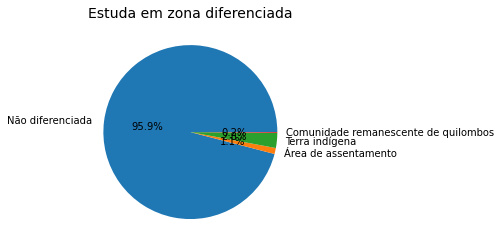

In [37]:
data_local_diferenciado = df.groupby("TP_LOCALIZACAO_DIFERENCIADA")['TP_LOCALIZACAO_DIFERENCIADA'].count()
pie, ax = plt.subplots()
labels = ["Não diferenciada ", "Área de assentamento", "Terra indígena", "Comunidade remanescente de quilombos"]
plt.pie(x=data_local_diferenciado, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Estuda em zona diferenciada", fontsize=14)
print(str(data_local_diferenciado[0]) + " Alunos não estudam em localização diferenciada")
print(str(data_local_diferenciado[1]) + " Alunos estudam em escola localizada em área de assentamento")
print(str(data_local_diferenciado[2]) + " Alunos estudam em escola localizada em terra indígena")
print(str(data_local_diferenciado[3]) + " Alunos estudam em escola localizada em comunidade remanescente de quilombos")

### Distribuição por Necessidade Especial

In [18]:
d = {
    'Nome': ['Cegueira', "Baixa Visão", "Deficiência Auditiva", "Deficiência Física", "Deficiência Intelectual", "Surdez", "Super Dotação", "Autismo", "Deficiência Múltipla", "Surdocegueira"],
    'Quantidade': [cegueira, baixa_visao, auditiva, def_fisica, def_inte, surdez, superd, autismo, def_multipla, surdocegueira]
}
quantidades_ne = pd.DataFrame(d)

In [19]:
data_necessidade = df.groupby("IN_NECESSIDADE_ESPECIAL")['IN_NECESSIDADE_ESPECIAL'].count()

102124 Alunos não possuem necessidades especiais
3849 Alunos possuem algum tipo de necessidade especials


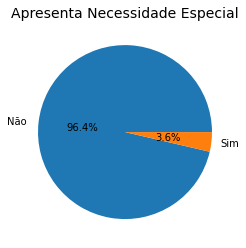

In [20]:
pie, ax = plt.subplots()
labels = ["Não ", "Sim"]
plt.pie(x=data_necessidade, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Apresenta Necessidade Especial", fontsize=14)
print(str(data_necessidade[0]) + " Alunos não possuem necessidades especiais")
print(str(data_necessidade[1]) + " Alunos possuem algum tipo de necessidade especials")

10.0 Alunos apresentam Cegueira
116.0 Alunos apresentam Baixa Visão
73.0 Alunos apresentam Deficiência Auditiva
350.0 Alunos apresentam Deficiência Física
2363.0 Alunos apresentam Deficiência Intelectual
75.0 Alunos apresentam Surdez
79.0 Alunos apresentam Super Dotação
1126.0 Alunos apresentam Autismo
172.0 Alunos apresentam Deficiência Múltipla
1.0 Alunos apresentam Surdocegueira


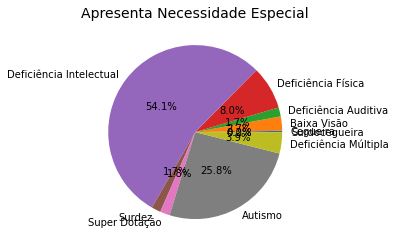

In [21]:
pie, ax = plt.subplots()
plt.pie(x=quantidades_ne['Quantidade'], labels = quantidades_ne['Nome'], autopct="%.1f%%", pctdistance=0.5)
plt.title("Apresenta Necessidade Especial", fontsize=14)

for index, row in quantidades_ne.iterrows():
    print(str(row["Quantidade"]) + " Alunos apresentam " + row['Nome'])

### Distribuição por Etapa de Ensino

<AxesSubplot:xlabel='TP_ETAPA_ENSINO', ylabel='Count'>

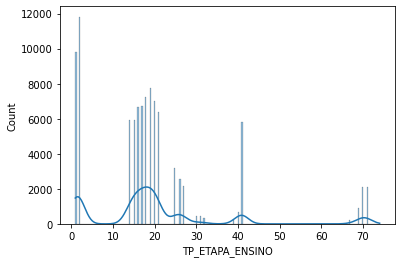

In [22]:
data_etapa = df.groupby("TP_ETAPA_ENSINO")['TP_ETAPA_ENSINO'].count()
sns.histplot(data=df, x="TP_ETAPA_ENSINO", kde = True, stat = 'count')

In [23]:
dicionario_etapa = {
    "14": "Ensino Fundamental de 9 anos - 1º Ano",
    "15" : "Ensino Fundamental de 9 anos : 2º Ano",
    "16" : "Ensino Fundamental de 9 anos : 3º Ano",
    "17" : "Ensino Fundamental de 9 anos : 4º Ano",
    "18" : "Ensino Fundamental de 9 anos : 5º Ano",
    "19" : "Ensino Fundamental de 9 anos : 6º Ano",
    "20" : "Ensino Fundamental de 9 anos : 7º Ano",
    "21" : "Ensino Fundamental de 9 anos : 8º Ano",
    "41" : "Ensino Fundamental de 9 anos : 9º Ano",
    "25" : "Ensino Médio : 1º ano/1ª Série",
    "26" : "Ensino Médio : 2º ano/2ª Série",
    "27" : "Ensino Médio : 3ºano/3ª Série",
    "28" : "Ensino Médio : 4º ano/4ª Série",
    "29" : "Ensino Médio : Não Seriada",
    "30" : "Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série",
    "31" : "Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série",
    "32" : "Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série",
    "33" : "Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série",
    "34" : "Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada",
    "35" : "Ensino Médio : Modalidade Normal/Magistério 1ª Série",
    "36" : "Ensino Médio : Modalidade Normal/Magistério 2ª Série",
    "37" : "Ensino Médio : Modalidade Normal/Magistério 3ª Série",
    "38" : "Ensino Médio : Modalidade Normal/Magistério 4ª Série",
    "39" : "Curso Técnico : Concomitante",
    "40" : "Curso Técnico : Subsequente",
    "67" : "Curso FIC integrado na modalidade EJA  : Nível Médio",
    "68" : "Curso FIC Concomitante",
    "69" : "EJA : Ensino Fundamental : Anos Iniciais",
    "70" : "EJA : Ensino Fundamental : Anos Finais",
    "71" : "EJA : Ensino Médio",
    "73" :"Curso FIC integrado na modalidade EJA - Nível Fundamental (EJA integrada à Educação Profissional de Nível Fundamental)",
    "74" :"Curso Técnico Integrado na Modalidade EJA (EJA integrada à Educação Profissional de Nível Médio)"
}

In [24]:
dicionario_etapa_2 = {
    "Ensino Fundamental de 9 anos , 1º Ano": "14.0",
    "Ensino Fundamental de 9 anos , 2º Ano": "15",
    "Ensino Fundamental de 9 anos , 3º Ano": "16",
    "Ensino Fundamental de 9 anos , 4º Ano":"17",
    "Ensino Fundamental de 9 anos , 5º Ano":"18.0", 
    "Ensino Fundamental de 9 anos , 6º Ano":"19", 
    "Ensino Fundamental de 9 anos , 7º Ano":"20", 
    "Ensino Fundamental de 9 anos , 8º Ano":"21", 
    "Ensino Fundamental de 9 anos , 9º Ano":"41", 
    "Ensino Médio , 1º ano/1ª Série":"25", 
    "Ensino Médio , 2º ano/2ª Série":"26", 
    "Ensino Médio , 3ºano/3ª Série":"27", 
    "Ensino Médio , 4º ano/4ª Série":"28", 
    "Ensino Médio , Não Seriada":"29", 
    "Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série":"30", 
    "Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série":"31", 
    "Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série":"32", 
    "Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série":"33", 
    "Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada":"34", 
    "Ensino Médio , Modalidade Normal/Magistério 1ª Série":"35", 
    "Ensino Médio , Modalidade Normal/Magistério 2ª Série":"36", 
    "Ensino Médio , Modalidade Normal/Magistério 3ª Série":"37", 
    "Ensino Médio , Modalidade Normal/Magistério 4ª Série":"38", 
    "Curso Técnico , Concomitante":"39",
    "Curso Técnico , Subsequente":"40",
    "Curso FIC integrado na modalidade EJA  , Nível Médio":"67",
    "Curso FIC Concomitante":"68", 
    "EJA , Ensino Fundamental , Anos Iniciais":"69", 
    "EJA , Ensino Fundamental , Anos Finais":"70", 
    "EJA , Ensino Médio": "71",
    "Curso FIC integrado na modalidade EJA : Nível Fundamental (EJA integrada à Educação Profissional de Nível Fundamental)": "73",
    "Curso Técnico Integrado na Modalidade EJA (EJA integrada à Educação Profissional de Nível Médio)": "74"
}

In [31]:
data_raca = df.groupby("TP_COR_RACA")['TP_COR_RACA'].count()


In [37]:
data_raca.sum()

105973

In [44]:
(data_raca[0] / total)

1.9142321707431785e-80

In [39]:
total = data_raca.sum()

In [45]:
quantidades_ne

,Nome,Quantidade
0,Cegueira,10.0
1,Baixa Visão,116.0
2,Deficiência Auditiva,73.0
3,Deficiência Física,350.0
4,Deficiência Intelectual,2363.0
5,Surdez,75.0
6,Super Dotação,79.0
7,Autismo,1126.0
8,Deficiência Múltipla,172.0
9,Surdocegueira,1.0


In [60]:
faixa_etaria=(50,55)
filtered_data = df.query("NU_IDADE >= @faixa_etaria[0] and NU_IDADE <= @faixa_etaria[1]")

In [61]:
filtered_data

,INDEX_PLANILHA_CE,INDEX_PLANILHA_NORDESTE,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,TP_SEXO,...,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
3915,204946,1007838,2020,FE7920AE62793800BC045ABA9B3F9E78,280144745,6,1970,49,50,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3917,205004,1008340,2020,665117D2A384BA6A4990BC26F0448AEC,280166845,6,1967,52,53,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
4816,255981,1259504,2020,4D3BF78AE04F7BC02633676B94B6044F,293663872,8,1966,53,54,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,0
5375,285466,1501800,2020,A6DB868204FF5C9750FA6891C9DCDCDF,313587943,12,1970,49,50,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
5389,286309,1508657,2020,0CD5285A17951770449FDEFC1A6C3959,320834000,12,1966,53,54,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104285,2355919,13954603,2020,D30B241ACF9BA94FCAB34D2B5A1A0BEC,450648294,3,1968,52,52,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
104597,2358900,13986157,2020,A7CE39B43ECA921832AC4F7769867774,450777460,8,1969,50,51,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,0
104937,2366911,14068161,2020,D17FE097AB94F5EA8E1AC7974EC7535E,451267423,11,1969,50,51,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1
105048,2368154,14079107,2020,649CBDE91091AD48C5771B601995A89C,451305308,4,1970,50,50,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [62]:
data_necessidade

IN_NECESSIDADE_ESPECIAL
0    102124
1      3849
Name: IN_NECESSIDADE_ESPECIAL, dtype: int64

In [72]:
moda.values

array([11])

In [74]:
df2 = df.query("NU_IDADE == 99") 

In [93]:
moda = df2['NU_IDADE'].mode()

In [98]:
if df2['NU_IDADE'].mode().size > 0:
    moda = moda[0]
else:
    moda = 0


In [99]:
moda

0

<bound method Index.unique of Index(['INDEX_PLANILHA_CE', 'INDEX_PLANILHA_NORDESTE', 'NU_ANO_CENSO',
       'ID_ALUNO', 'ID_MATRICULA', 'NU_MES', 'NU_ANO', 'NU_IDADE_REFERENCIA',
       'NU_IDADE', 'TP_SEXO',
       ...
       'IN_MANT_ESCOLA_PRIVADA_EMP', 'IN_MANT_ESCOLA_PRIVADA_ONG',
       'IN_MANT_ESCOLA_PRIVADA_OSCIP', 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
       'IN_MANT_ESCOLA_PRIVADA_SIND', 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
       'IN_MANT_ESCOLA_PRIVADA_S_FINS', 'TP_REGULAMENTACAO',
       'TP_LOCALIZACAO_DIFERENCIADA', 'IN_EDUCACAO_INDIGENA'],
      dtype='object', length=105)>

In [111]:
df.IN_NECESSIDADE_ESPECIAL.unique()

array([0, 1])